In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [207]:
dataset = pd.read_csv('gold.csv')
x= dataset.iloc[:,2:3].values
y = dataset.iloc[:, -1].values

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [209]:
from sklearn.linear_model import LinearRegression
gold_model = LinearRegression()
gold_model.fit(x_train, y_train)

LinearRegression()

In [210]:
y_pred = gold_model.predict(x_test)

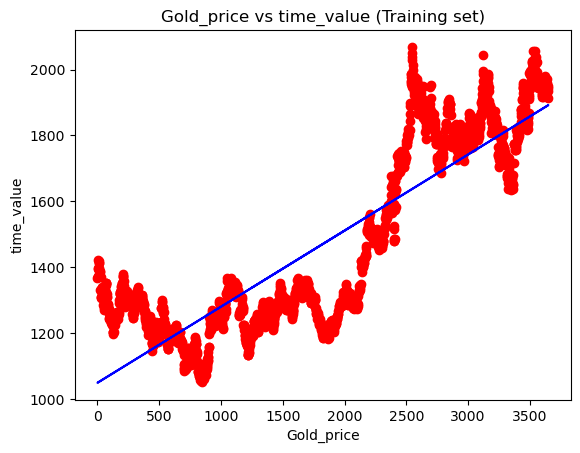

In [211]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, gold_model.predict(x_train), color = 'blue')
plt.title('Gold_price vs time_value (Training set)')
plt.xlabel('Gold_price')
plt.ylabel('time_value')
plt.show()

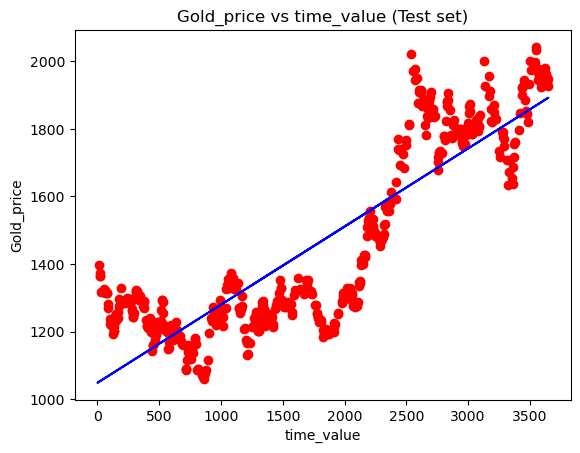

In [212]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, gold_model.predict(x_train), color = 'blue')
plt.title('Gold_price vs time_value (Test set)')
plt.xlabel('time_value')
plt.ylabel('Gold_price')
plt.show()

In [213]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7360402667622573


POLYNOMIAL REGRESSION

In [214]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
gold_model2 = LinearRegression()
gold_model2.fit(x_poly, y)

LinearRegression()

In [216]:
gold_model2.predict(poly_reg.fit_transform([[3651]]))

array([1837.39081939])

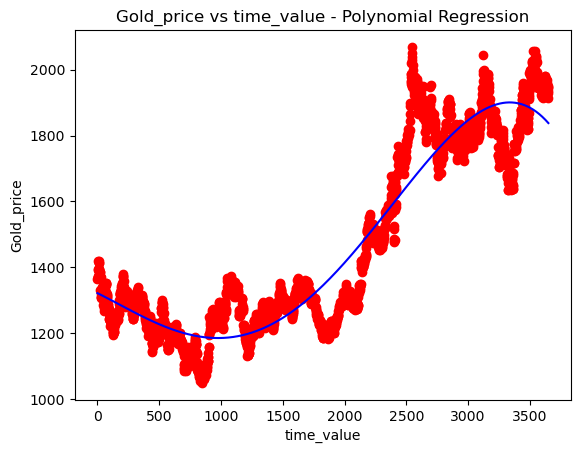

In [217]:
plt.scatter(x, y, color = 'red')
plt.plot(x, gold_model2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Gold_price vs time_value - Polynomial Regression')
plt.xlabel('time_value')
plt.ylabel('Gold_price')
plt.show()

In [218]:
from sklearn.metrics import r2_score
r2_p = r2_score(y, gold_model2.predict(poly_reg.fit_transform(x)))
print(r2_p)

0.8840561854326562


SVR

In [219]:
y_svr = y.reshape(len(y),1)

In [220]:
print(y)

[1915.2 1928.3 1935.2 ... 1370.1 1372.6 1365.7]


In [221]:
print(y_svr)

[[1915.2]
 [1928.3]
 [1935.2]
 ...
 [1370.1]
 [1372.6]
 [1365.7]]


In [222]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_svr = sc_x.fit_transform(x)
y_svr = sc_y.fit_transform(y_svr)

In [223]:
print(x_svr)

[[ 1.73726789]
 [ 1.73632231]
 [ 1.73537673]
 ...
 [-1.71221278]
 [-1.71315836]
 [-1.71410394]]


In [224]:
print(y_svr)

[[ 1.58311776]
 [ 1.62943436]
 [ 1.65383013]
 ...
 [-0.34414816]
 [-0.33530911]
 [-0.35970488]]


In [225]:
from sklearn.svm import SVR
gold_model_svr = SVR(kernel = 'rbf')
gold_model_svr.fit(x_svr, y_svr.flatten())

SVR()

In [226]:
sc_y.inverse_transform(gold_model_svr.predict(sc_x.transform([[3651]])).reshape(-1,1))

array([[1995.51908407]])

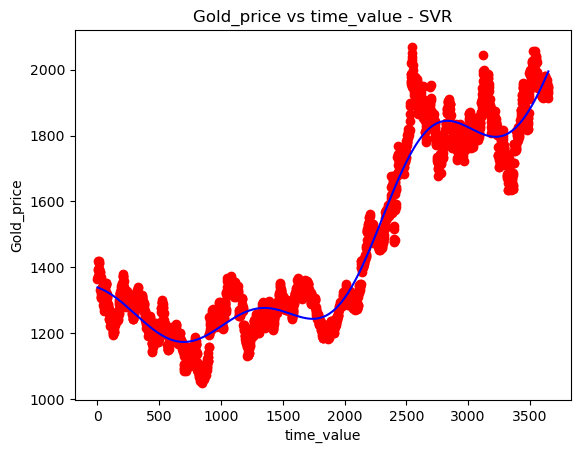

In [227]:
plt.scatter(sc_x.inverse_transform(x_svr), sc_y.inverse_transform(y_svr), color = 'red')
plt.plot(sc_x.inverse_transform(x_svr), sc_y.inverse_transform(gold_model_svr.predict(x_svr).reshape(-1,1)), color = 'blue')
plt.title('Gold_price vs time_value - SVR')
plt.xlabel('time_value')
plt.ylabel('Gold_price')
plt.show()

In [228]:
from sklearn.metrics import r2_score
r2_s = r2_score(y, sc_y.inverse_transform(gold_model_svr.predict(x_svr).reshape(-1,1)))
print(r2_s)

0.9426873057941653


DESICION TREE

In [229]:
from sklearn.tree import DecisionTreeRegressor
gold_model_des = DecisionTreeRegressor(random_state = 0)
gold_model_des.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [230]:
gold_model_des.predict([[3651]])

array([1915.2])

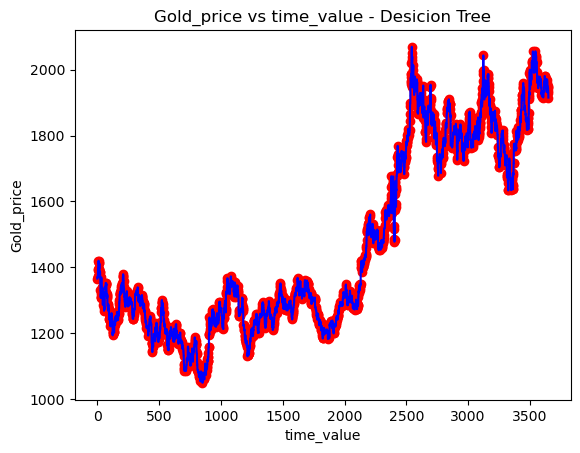

In [231]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, gold_model_des.predict(X_grid), color = 'blue')
plt.title('Gold_price vs time_value - Desicion Tree')
plt.xlabel('time_value')
plt.ylabel('Gold_price')
plt.show()

In [232]:
from sklearn.metrics import r2_score
r2_d = r2_score(y, gold_model_des.predict(x))
print(r2_d)

1.0


Overfitting is observed in the above model

RANDOM FOREST

In [233]:
from sklearn.ensemble import RandomForestRegressor
gold_model_ranf = RandomForestRegressor(n_estimators = 10, random_state = 0)
gold_model_ranf.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [234]:
gold_model_ranf.predict([[3651]])

array([1924.44])

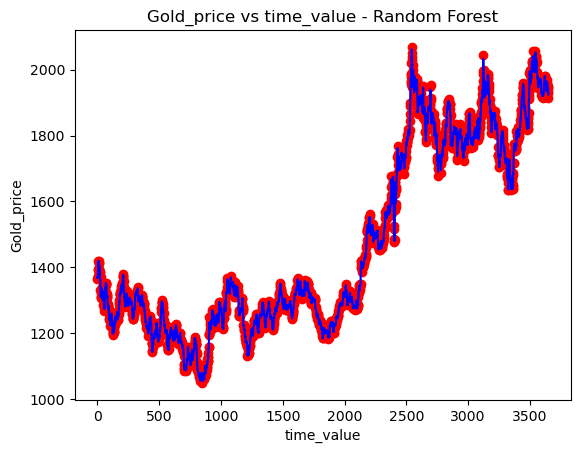

In [235]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, gold_model_ranf.predict(X_grid), color = 'blue')
plt.title('Gold_price vs time_value - Random Forest')
plt.xlabel('time_value')
plt.ylabel('Gold_price')
plt.show()

In [236]:
from sklearn.metrics import r2_score
r2_r = r2_score(y, gold_model_ranf.predict(x))
print(r2_r)

0.9996277660560957


overfitting 
Both desicion tree and random forest models can't be used in this case 
SVM model gives the most efficient results